In [1]:
import os 
import tqdm
import math
import random
import operator
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

dir_ = '../data/'
file_name = 'normalized_to_rating_filter_track_5_user_100.csv'

In [2]:
train = pd.read_pickle(os.path.join(dir_, 'train_' + file_name[:-3] + 'pkl'))

In [3]:
num_user = len(train['uid'].unique())
print(num_user)

220


In [4]:
# Setup the number of customers in the beginning
user_status = []
for i in range(num_user):
    user_status.append(False)

customers = []

customer_init = int(random.random()*10//1 + 5) # 5-15
print('Initial customer : ', customer_init)
while customer_init > 0:
    group_size = int(random.random()*5//1 + 1)
    if group_size > customer_init:
        group_size = customer_init # Constrain the value
                
    customer = []
    
    for i in range(group_size):
        u = int(random.random()*num_user//1)
        if user_status[u] == False:
            user_status[u] = True
        else:
            while user_status[u]:
                u = int(random.random()*num_user//1)
            user_status[u] = True
        customer.append(u)
        
    customers.append(customer)
    customer_init -= group_size
    
print(customers)

Initial customer :  10
[[181, 22], [80, 123, 51, 176, 42], [56], [120, 77]]


In [5]:
# Setup the arrival time of the initial customers
arrivals = []
for i in range(len(customers)):
    arrivals.append(0)
arrivals

[0, 0, 0, 0]

In [6]:
time_sim = 0
time_to_sim = 120

while time_sim < time_to_sim:
    
    inter_arrival = int(np.random.exponential(5))
    arrival = time_sim + inter_arrival
    
    if arrival < time_to_sim:
        customer = []        
        group_size = int(random.random()*5//1 + 1)

        for i in range(group_size):
            u = int(random.random()*num_user//1)
            if user_status[u] == False:
                user_status[u] = True
            else:
                while user_status[u]:
                    u = int(random.random()*num_user//1)
                user_status[u] = True
            customer.append(u)

        customers.append(customer)
        arrivals.append(arrival)
        
    time_sim += inter_arrival

In [7]:
departures = []
for i in range(len(customers)):
    service_time = int(np.random.exponential(20))
    if service_time < 5:
        service_time = 5
    departure = arrivals[i] + service_time
    departures.append(departure)

In [8]:
pd_sim = pd.DataFrame(columns=['gid','arrival','departure', 'sevice', 'members'])

for i in range(len(customers)):
    pd_sim = pd_sim.append({'gid': i, 'arrival': arrivals[i], 'departure': departures[i],'sevice': (departures[i]-arrivals[i]), 'members': customers[i]}, ignore_index=True)
    
pd_sim

,gid,arrival,departure,sevice,members
0,0,0,5,5,"[181, 22]"
1,1,0,49,49,"[80, 123, 51, 176, 42]"
2,2,0,5,5,[56]
3,3,0,36,36,"[120, 77]"
4,4,1,21,20,"[8, 86]"
5,5,3,28,25,[79]
6,6,4,47,43,"[76, 203, 167]"
7,7,4,64,60,[174]
8,8,4,10,6,"[5, 135]"
9,9,18,26,8,"[204, 188]"


In [9]:
pd_sim.to_pickle('simulation.pkl')

In [10]:
pd_sim = pd.read_pickle('simulation.pkl')
pd_sim

,gid,arrival,departure,sevice,members
0,0,0,5,5,"[181, 22]"
1,1,0,49,49,"[80, 123, 51, 176, 42]"
2,2,0,5,5,[56]
3,3,0,36,36,"[120, 77]"
4,4,1,21,20,"[8, 86]"
5,5,3,28,25,[79]
6,6,4,47,43,"[76, 203, 167]"
7,7,4,64,60,[174]
8,8,4,10,6,"[5, 135]"
9,9,18,26,8,"[204, 188]"


In [11]:
predictions_user = pd.read_pickle(os.path.join(dir_, 'prediction_cf_user_top_N_' + file_name[:-3] + 'pkl'))
predictions_SVD_user = pd.read_pickle(os.path.join(dir_, 'prediction_SVD_user_top_N_' + file_name[:-3] + 'pkl'))
prediction_SVD = pd.read_pickle(os.path.join(dir_, 'prediction_svd_top_N_' + file_name[:-3] + 'pkl'))
prediction_popularity = pd.read_pickle(os.path.join(dir_, 'prediction_popularity_count_top_N_normalized_popularity_filter_track_5_user_100.pkl'))

In [12]:
test = pd.read_pickle(os.path.join(dir_, 'test_' + file_name[:-3] + 'pkl'))

In [13]:
test

,uid,tid,rating
481832,90,5374,0.25
1247457,214,35528,1.25
968433,172,29367,4.25
25524,4,11632,4.25
60178,8,19012,0.25
...,...,...,...
587045,115,27784,3.25
309534,65,12495,0.25
660480,130,20821,0.25
373255,73,27444,2.75


In [14]:
n = 10000
Top_N_List =  pd.DataFrame() 
for _, group in pd_sim.iterrows():
    if len(group['members']) == 1:
        m = prediction_SVD[prediction_SVD['uid'] == group['members'][0]]
    elif len(group['members']) == 2:
        u1 = prediction_SVD[prediction_SVD['uid'] == group['members'][0]]
        u2 = prediction_SVD[prediction_SVD['uid'] == group['members'][1]]
        m = pd.merge(u1, u2, on=['tid'], how='inner', suffixes=['_u1','_u2'])
        m = m[['tid', 'rating_u1','rating_u2']]
        m['rating'] = (m['rating_u1'] + m['rating_u2'])/2
    elif len(group['members']) == 3:
        u1 = prediction_SVD[prediction_SVD['uid'] == group['members'][0]]
        u2 = prediction_SVD[prediction_SVD['uid'] == group['members'][1]]
        u3 = prediction_SVD[prediction_SVD['uid'] == group['members'][2]]
        m = pd.merge(u1, u2, on=['tid'], how='inner', suffixes=['_u1','_u2'])
        m = pd.merge(m,  u3, on=['tid'], how='inner')
        m = m[['tid', 'rating_u1','rating_u2','rating']]
        m['rating'] = (m['rating_u1'] + m['rating_u2'] + m['rating'])/3
    elif len(group['members']) == 4:
        u1 = prediction_SVD[prediction_SVD['uid'] == group['members'][0]]
        u2 = prediction_SVD[prediction_SVD['uid'] == group['members'][1]]
        u3 = prediction_SVD[prediction_SVD['uid'] == group['members'][2]]
        u4 = prediction_SVD[prediction_SVD['uid'] == group['members'][3]]
        m = pd.merge(u1, u2, on=['tid'], how='inner', suffixes=['_u1','_u2'])
        m = pd.merge(m,  u3, on=['tid'], how='inner', suffixes=['','_u3'])
        m = pd.merge(m,  u4, on=['tid'], how='inner', suffixes=['_u3','_u4'])
        m = m[['tid', 'rating_u1','rating_u2','rating_u3','rating_u4']]
        m['rating'] = (m['rating_u1'] + m['rating_u2'] + m['rating_u3'] + m['rating_u4'])/4
    elif len(group['members']) == 5:
        u1 = prediction_SVD[prediction_SVD['uid'] == group['members'][0]]
        u2 = prediction_SVD[prediction_SVD['uid'] == group['members'][1]]
        u3 = prediction_SVD[prediction_SVD['uid'] == group['members'][2]]
        u4 = prediction_SVD[prediction_SVD['uid'] == group['members'][3]]
        u5 = prediction_SVD[prediction_SVD['uid'] == group['members'][4]]
        m = pd.merge(u1, u2, on=['tid'], how='inner', suffixes=['_u1','_u2'])
        m = pd.merge(m,  u3, on=['tid'], how='inner', suffixes=['','_u3'])
        m = pd.merge(m,  u4, on=['tid'], how='inner', suffixes=['','_u4'])
        m = pd.merge(m,  u5, on=['tid'], how='inner', suffixes=['_u3','_u5'])
        m = m[['tid', 'rating_u1','rating_u2','rating_u3','rating_u4','rating_u5']]
        m['rating'] = (m['rating_u1'] + m['rating_u2'] + m['rating_u3'] + m['rating_u4'] + m['rating_u5'])/5 
    else:
        print('Error')
    m = m[['tid', 'rating']]
    m = m.sort_values(by=['rating'],  ascending=False)
    m = m[:n]   
    m['gid'] = group['gid']
    Top_N_List = Top_N_List.append(m)

In [38]:
total_all = 0
sat_SVD_all = 0
sat_pop_all = 0
for _, group in pd_sim.iterrows():
    gid = group['gid']
    members = group['members']
    Top_N = Top_N_List[Top_N_List['gid'] == gid].copy()
    Top_N = Top_N.sort_values(by=['rating'],  ascending=False)
    
    total = 0
    hit_SVD = 0
    hit_pop = 0
    for t in range(4):
        hit_SVD = 0
        total += 1
        tid = Top_N.iloc[t]['tid']
        for uid in members:
            test_SVD = test[test['uid'] == uid].copy()
            test_SVD = test_SVD[test_SVD['tid'] == tid]
            if len(test_SVD) > 0 and test_SVD.iloc[0]['rating'] >= rating:
                hit_SVD +=1
        satisfaction_SVD += math.log(hit_SVD+1,10)/math.log(len(members)+1,10)
        
    for t in range(4):
        tid = prediction_popularity.sort_values(by=['count'],  ascending=False).copy()
        tid = prediction_popularity.iloc[t]['tid']
        for uid in members:
            test_pop = test[test['uid'] == uid].copy()
            test_pop = test_pop[test_pop['tid'] == tid]
            if len(test_pop) > 0 and test_pop.iloc[0]['rating'] >= rating:
                hit_pop +=1
        satisfaction_pop += math.log(hit_pop+1,10)/math.log(len(members)+1,10)
    total_all += total
    sat_SVD_all += hit_SVD
    sat_pop_all += hit_pop
print(total_all, sat_SVD_all/ total_all, sat_pop_all/ total_all)


152 0.13815789473684212 0.5328947368421053


In [37]:
total_all = 0
hit_SVD_all = 0
hit_pop_all = 0
rating = 0
for _, group in pd_sim.iterrows():
    gid = group['gid']
    members = group['members']
    Top_N = Top_N_List[Top_N_List['gid'] == gid].copy()
    Top_N = Top_N.sort_values(by=['rating'],  ascending=False)
    
    total = 0
    hit_SVD = 0
    hit_pop = 0
    for t in range(4):
        total += 1
        tid = Top_N.iloc[t]['tid']
        for uid in members:
            test_SVD = test[test['uid'] == uid].copy()
            test_SVD = test_SVD[test_SVD['tid'] == tid]
            if len(test_SVD) > 0 and test_SVD.iloc[0]['rating'] >= rating:
                hit_SVD +=1
                break
    for t in range(4):
        tid = prediction_popularity.sort_values(by=['count'],  ascending=False).copy()
        tid = prediction_popularity.iloc[t]['tid']
        for uid in members:
            test_pop = test[test['uid'] == uid].copy()
            test_pop = test_pop[test_pop['tid'] == tid]
            if len(test_pop) > 0 and test_pop.iloc[0]['rating'] >= rating:
                hit_pop +=1
                break
    total_all += total
    hit_SVD_all += hit_SVD
    hit_pop_all += hit_pop
print(total_all, hit_SVD_all/ total_all, hit_pop_all/ total_all)


152 0.46710526315789475 0.39473684210526316


In [27]:
Top_N_List['listened'] = False
Top_N_List['count'] = 1
Top_N_List

,tid,rating,gid,listened,count
1132,1354.0,2.683340,0,False,1
2918,3463.0,2.599877,0,False,1
21651,23368.0,2.580626,0,False,1
990,1196.0,2.579401,0,False,1
9060,10092.0,2.575318,0,False,1
...,...,...,...,...,...
17514,22471.0,2.221815,37,False,1
13353,17030.0,2.221776,37,False,1
7883,10021.0,2.221761,37,False,1
44294,51038.0,2.221743,37,False,1


In [28]:
playlist = []
for t in range(int(time_to_sim/5)):
    groups = pd_sim[pd_sim['arrival']<=t*5]
    groups = groups[groups['departure']>t*5]
    rating_table = pd.DataFrame() 
    for _, j in groups.iterrows():
        w = math.pow( 0.5, (t*5 - j['arrival'])//5)
        if len(rating_table) == 0:
            rating_table = Top_N_List[Top_N_List['gid'] == j['gid']].copy()
            rating_table['rating'] = rating_table['rating']*w
        else:
            r_t = Top_N_List[Top_N_List['gid'] == j['gid']].copy()
            r_t['rating'] = r_t['rating']*w
            rating_table = rating_table.set_index('tid').add(r_t.set_index('tid'), fill_value=0).reset_index()
        rating_table = rating_table.sort_values(by=['rating'],  ascending=False)
            
    tid = rating_table.iloc[0]['tid']
    k = 0
    while rating_table.iloc[k]['listened']: #避免重複推薦
        k += 1
        tid = rating_table.iloc[k]['tid']
    playlist.append(tid)
    
    for _, j in groups.iterrows(): #避免重複推薦(紀錄已經被推薦過的歌曲)
        gid = j['gid']
        Top_N_List.loc[operator.and_((Top_N_List['tid']==tid), (Top_N_List['gid']==gid)), ['listened']] = True

In [29]:
playlist_pop = []
pop_list = np.zeros(24)
prediction_popularity = prediction_popularity.sort_values(by=['count'],  ascending=False)
pop = prediction_popularity[:24].reset_index().copy()
for i in range(int(time_to_sim/5)):
    t = int(random.random()*24//1)
    while pop_list[t] != 0:
        t = int(random.random()*24//1)
    tid = pop.iloc[t]['tid']
    playlist_pop.append(tid)
    pop_list[t] += 1

In [30]:
totals = []
hits_SVD = []
hits_pop = []
rating = 1.0
    
for _, group in pd_sim.iterrows():
    arrival = group['arrival']
    departure = group['departure']
    members = group['members']
    start = int(arrival//5)
    end = int(math.ceil(departure/5))
    if end > len(playlist):
        end = len(playlist)
    
    total = 0
    hit_SVD = 0
    hit_pop = 0
    for t in range(start,end):
        total += 1
        for uid in members:
            test_SVD = test[test['uid'] == uid].copy()
            test_SVD = test_SVD[test_SVD['tid'] == playlist[t]]
            if len(test_SVD) > 0 and test_SVD.iloc[0]['rating'] >= rating:
                hit_SVD +=1
                break
    for t in range(start,end):
        for uid in members:
            test_pop = test[test['uid'] == uid].copy()
            test_pop = test_pop[test_pop['tid'] == playlist_pop[t]]
            if len(test_pop) > 0 and test_pop.iloc[0]['rating'] >= rating:
                hit_pop +=1
                break
#     print(total, hit_SVD, hit_pop)
    totals.append(total)
    hits_SVD.append(hit_SVD)
    hits_pop.append(hit_pop)

In [31]:
precision_SVD = []
precision_pop = []
for i in range(len(pd_sim)):
    precision_SVD.append(hits_SVD[i]/totals[i])
    precision_pop.append(hits_pop[i]/totals[i])
pd_sim_ = pd_sim.assign(precision_SVD = precision_SVD) 
pd_sim_ = pd_sim_.assign(precision_pop = precision_pop) 

avg_precision_SVD = 0
avg_precision_pop = 0
for i in range(len(pd_sim)):
    avg_precision_SVD += precision_SVD[i]
    avg_precision_pop += precision_pop[i]
avg_precision_SVD /= len(pd_sim)
avg_precision_pop /= len(pd_sim)
print(avg_precision_SVD, avg_precision_pop)
pd_sim_

0.23295739348370928 0.3019809138230191


,gid,arrival,departure,sevice,members,precision_SVD,precision_pop
0,0,0,5,5,"[181, 22]",1.000000,0.000000
1,1,0,49,49,"[80, 123, 51, 176, 42]",0.300000,0.300000
2,2,0,5,5,[56],1.000000,0.000000
3,3,0,36,36,"[120, 77]",0.000000,0.250000
4,4,1,21,20,"[8, 86]",0.000000,0.200000
5,5,3,28,25,[79],0.500000,0.333333
6,6,4,47,43,"[76, 203, 167]",0.200000,0.700000
7,7,4,64,60,[174],0.000000,0.076923
8,8,4,10,6,"[5, 135]",0.000000,0.500000
9,9,18,26,8,"[204, 188]",0.333333,0.333333


In [32]:
totals = []
satisfactions_SVD = []
satisfactions_pop = []
    
for _, group in pd_sim.iterrows():
    arrival = group['arrival']
    departure = group['departure']
    members = group['members']
    start = int(arrival//5)
    end = int(math.ceil(departure/5))
    if end > len(playlist):
        end = len(playlist)
    
    total = 0

    satisfaction_SVD = 0
    satisfaction_pop = 0
    for t in range(start,end):
        total += 1
        hit_SVD = 0
        for uid in members:
            test_SVD = test[test['uid'] == uid].copy()
            test_SVD = test_SVD[test_SVD['tid'] == playlist[t]]
            if len(test_SVD) > 0 and test_SVD.iloc[0]['rating'] >= rating:
                hit_SVD +=1
        satisfaction_SVD += math.log(hit_SVD+1,10)/math.log(len(members)+1,10)
#         print(math.log(hit_SVD+1,10)/math.log(len(members)+1,10),'\n------------------')
        
    for t in range(start,end):
        hit_pop = 0
        for uid in members:
            test_pop = test[test['uid'] == uid].copy()
            test_pop = test_pop[test_pop['tid'] == playlist_pop[t]]
            if len(test_pop) > 0 and test_pop.iloc[0]['rating'] >= rating:
                hit_pop +=1
        satisfaction_pop += math.log(hit_pop+1,10)/math.log(len(members)+1,10)
#         print(math.log(hit_pop+1,10)/math.log(len(members)+1,10))

    totals.append(total)
    satisfactions_SVD.append(satisfaction_SVD)
    satisfactions_pop.append(satisfaction_pop)
#     print('------------------')


In [33]:
for i in range(len(pd_sim)):
    satisfactions_SVD[i] = satisfactions_SVD[i]/totals[i]
    satisfactions_pop[i] = satisfactions_pop[i]/totals[i]

pd_sim_ = pd_sim_.assign(satisfactions_SVD = satisfactions_SVD) 
pd_sim_ = pd_sim_.assign(satisfactions_pop = satisfactions_pop) 

avg_satisfactions_SVD = 0
avg_satisfactions_pop = 0
for i in range(len(pd_sim)):
    avg_satisfactions_SVD += satisfactions_SVD[i]
    avg_satisfactions_pop += satisfactions_pop[i]
avg_satisfactions_SVD /= len(pd_sim)
avg_satisfactions_pop /= len(pd_sim)
print(avg_satisfactions_SVD, avg_satisfactions_pop)
pd_sim_

0.14308817549279665 0.17789751461941297


,gid,arrival,departure,sevice,members,precision_SVD,precision_pop,satisfactions_SVD,satisfactions_pop
0,0,0,5,5,"[181, 22]",1.000000,0.000000,0.630930,0.000000
1,1,0,49,49,"[80, 123, 51, 176, 42]",0.300000,0.300000,0.138685,0.138685
2,2,0,5,5,[56],1.000000,0.000000,1.000000,0.000000
3,3,0,36,36,"[120, 77]",0.000000,0.250000,0.000000,0.157732
4,4,1,21,20,"[8, 86]",0.000000,0.200000,0.000000,0.126186
5,5,3,28,25,[79],0.500000,0.333333,0.500000,0.333333
6,6,4,47,43,"[76, 203, 167]",0.200000,0.700000,0.100000,0.379248
7,7,4,64,60,[174],0.000000,0.076923,0.000000,0.076923
8,8,4,10,6,"[5, 135]",0.000000,0.500000,0.000000,0.315465
9,9,18,26,8,"[204, 188]",0.333333,0.333333,0.210310,0.210310


In [22]:
customers_in_store = []
for i in range(int(time_to_sim/5)):
    groups = pd_sim[pd_sim['arrival']<=i*5]
    groups = groups[groups['departure']>i*5]
    customers_in_store.append(len(groups))
customers_in_store

[4, 7, 6, 6, 9, 10, 7, 9, 8, 9, 8, 6, 4, 2, 3, 1, 3, 4, 3, 3, 3, 6, 6, 4]

In [23]:
group_size = [0,0,0,0,0]
for _, i in pd_sim.iterrows():
    group_size[len(i['members'])-1] += 1
group_size

[5, 11, 7, 8, 7]

In [26]:
service_time = np.zeros(24)
for _, i in pd_sim.iterrows():
    service_time[int(int(i['sevice'])//5)] += 1
service_time

array([ 0., 21.,  2.,  3.,  3.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [137]:
s_ = np.random.exponential(10, size=10)
s_

array([29.37582606, 17.8963053 , 20.37808245,  8.97068483,  3.01326122,
        9.15510813, 12.87885988,  0.2708733 ,  7.04952649,  1.0608896 ])

In [32]:
s = np.random.poisson(1, 10000)
s

array([0, 0, 1, ..., 0, 1, 2])

C:\Users\han\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


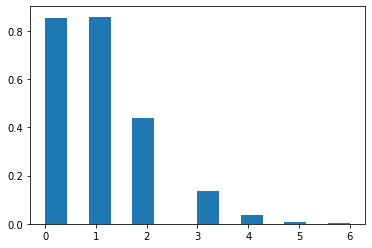

In [18]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 14, normed=True)
plt.show()